## 한글처리

In [1]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,318 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [2]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [3]:
from collections import Counter
# Counter(text_split)

## 데이터 전처리

In [12]:
it_sentences = [
    "인공지능 기술이 사회의 다양한 분야에 점점 더 널리 적용되고 있다.",
    "클라우드 컴퓨팅은 데이터 저장과 처리를 더욱 효율적으로 만들어 주며, 기업의 IT 인프라를 혁신하고 있다.",
    "머신러닝과 딥러닝 알고리즘은 데이터 분석과 예측 모델링에 혁명을 일으키고 있다.",
    "블록체인 기술은 금융 거래의 투명성과 보안성을 향상시키는데 기여하고 있다.",
    "사이버 보안은 디지털 시대의 중요한 이슈로 부상하고 있으며, 지속적인 관심과 개선이 요구된다.",
    "소프트웨어 개발에서의 애자일 방법론은 빠른 시장 변화에 효과적으로 대응할 수 있게 해준다.",
    "데이터 과학과 분석은 비즈니스 의사 결정 과정에서 중요한 역할을 하며, 기업의 경쟁력을 강화시킨다.",
    "사물인터넷(IoT) 기술은 일상 생활을 더욱 편리하고 연결된 공간으로 변화시키고 있다.",
    "가상현실(VR)과 증강현실(AR) 기술은 엔터테인먼트, 교육, 의료 등 다양한 분야에서 새로운 경험을 제공한다.",
    "파이썬은 데이터 과학, 웹 개발, 자동화 스크립트 작성 등 다양한 프로그래밍 작업에 널리 사용되는 언어이다."
]

## Mecab

In [10]:
!pip install python-mecab-ko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.9/573.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 35.1 MB/s eta 0:00:00


In [11]:
from mecab import MeCab
mecab = MeCab()
mecab

In [13]:
mecab.nouns(it_sentences[3])

['블록체인', '기술', '금융', '거래', '투명', '보안', '향상', '데', '기여']

In [16]:
morphs_nouns = []
morphs_nouns_list=[]
for sentence in it_sentences:
  morphs = mecab.nouns(sentence)
  # morphs_nouns.append(morphs)
  morphs_nouns_list = morphs_nouns_list + morphs
# morphs_nouns
# morphs_nouns_list

In [17]:
from collections import Counter
nouns_count = Counter(morphs_nouns_list)

In [18]:
text = ' '.join(nouns_count)
text_split = text.split()
text_split[:2],len(text_split)

(['인공지능', '기술'], 84)

## wordcloud

In [19]:
from wordcloud import WordCloud

In [20]:
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_text(text)

In [21]:
wordCloud.words_

{'인공지능': 1.0,
 '기술': 1.0,
 '사회': 1.0,
 '다양': 1.0,
 '분야': 1.0,
 '적용': 1.0,
 '클라우드': 1.0,
 '컴퓨팅': 1.0,
 '데이터': 1.0,
 '저장': 1.0,
 '처리': 1.0,
 '효율': 1.0,
 '기업': 1.0,
 '인프라': 1.0,
 '혁신': 1.0,
 '머신': 1.0,
 '러닝': 1.0,
 '딥': 1.0,
 '알고리즘': 1.0,
 '분석': 1.0,
 '예측': 1.0,
 '모델링': 1.0,
 '혁명': 1.0,
 '블록체인': 1.0,
 '금융': 1.0,
 '거래': 1.0,
 '투명': 1.0,
 '보안': 1.0,
 '향상': 1.0,
 '데': 1.0,
 '기여': 1.0,
 '사이버': 1.0,
 '디지털': 1.0,
 '시대': 1.0,
 '중요': 1.0,
 '이슈': 1.0,
 '부상': 1.0,
 '지속': 1.0,
 '관심': 1.0,
 '개선': 1.0,
 '요구': 1.0,
 '소프트웨어': 1.0,
 '개발': 1.0,
 '애자일': 1.0,
 '방법론': 1.0,
 '시장': 1.0,
 '변화': 1.0,
 '효과': 1.0,
 '대응': 1.0,
 '수': 1.0,
 '과학': 1.0,
 '비즈니스': 1.0,
 '의사': 1.0,
 '결정': 1.0,
 '과정': 1.0,
 '역할': 1.0,
 '경쟁력': 1.0,
 '강화': 1.0,
 '사물': 1.0,
 '인터넷': 1.0,
 '일상': 1.0,
 '생활': 1.0,
 '편리': 1.0,
 '연결': 1.0,
 '공간': 1.0,
 '가상현실': 1.0,
 '증강현실': 1.0,
 '엔터': 1.0,
 '테': 1.0,
 '트': 1.0,
 '교육': 1.0,
 '의료': 1.0,
 '등': 1.0,
 '경험': 1.0,
 '제공': 1.0,
 '파이썬': 1.0,
 '웹': 1.0,
 '자동': 1.0,
 '스크립트': 1.0,
 '작성': 1.0,
 '프로그래밍': 1.0,
 '

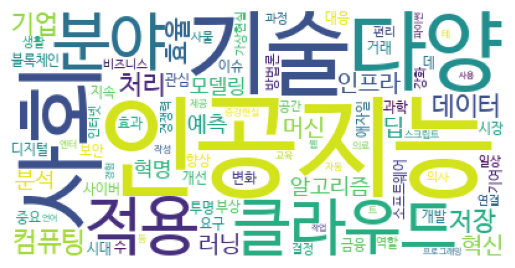

In [22]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()